In [63]:
# importing a necessary libararies
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input,Flatten,Dense,Conv2D,MaxPooling2D,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras import Model

In [29]:
# laoding a dataset
(train_images,train_labels),(test_images,test_labels)=cifar10.load_data()

In [30]:
# shape of the dataset
print('train images shape: ',train_images.shape)
print('train images shape: ',train_labels.shape)
print('test images shape: ',test_images.shape)
print('test labels shape: ',test_labels.shape)

train images shape:  (50000, 32, 32, 3)
train images shape:  (50000, 1)
test images shape:  (10000, 32, 32, 3)
test labels shape:  (10000, 1)


In [31]:
# preprocessing a dataset
train_images,test_images=train_images/255.0,test_images/255.0
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

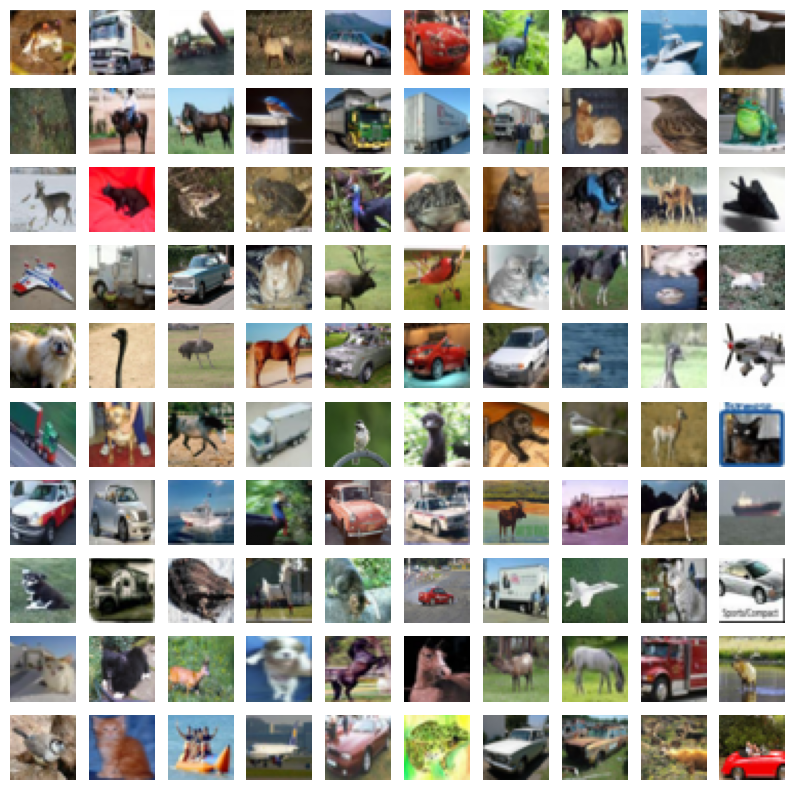

In [32]:
# printing first 100 images
fig,ax=plt.subplots(10,10,figsize=(10,10))
k=0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(train_images[k])
        ax[i][j].axis('off')
        k+=1
plt.show()        

In [65]:
# train the model using functional API
# output shape
o=train_labels.shape[1]
# input size
i=Input(shape=train_images[0].shape)
x=Conv2D(filters=32,kernel_size=(3,3),padding='same',strides=(1,1),activation='relu')(i)
x=BatchNormalization()(x)
x=Conv2D(filters=32,kernel_size=(3,3),padding='same',strides=(1,1),activation='relu')(x)
x=BatchNormalization()(x)
x=MaxPooling2D(pool_size=(2,2))(x)

x=Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu')(x)
x=BatchNormalization()(x)
x=Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu')(x)
x=BatchNormalization()(x)
x=MaxPooling2D(pool_size=(2,2))(x)

x=Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu')(x)
x=BatchNormalization()(x)
x=Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu')(x)
x=BatchNormalization()(x)
x=MaxPooling2D(pool_size=(2,2))(x)

x=Flatten()(x)

x=Dense(1024,activation='relu')(x)
x=Dropout(0.2)(x)

x=Dense(o,activation='softmax')(x)

model=Model(i,x)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)          │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_45 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_41               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_46 (Conv2D)                   │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_42               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_47 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_43               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_48 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_44               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_49 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_45               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_50 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_46               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 2,397,226 (9.14 MB)

 Trainable params: 2,396,330 (9.14 MB)

 Non-trainable params: 896 (3.50 KB)

In [72]:
# compile the model
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [73]:
# train the model
history=model.fit(train_images,train_labels,
         validation_data=(test_images,test_labels),
         epochs=10,
         batch_size=32,
         )

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 50ms/step - accuracy: 0.4635 - loss: 1.6741 - val_accuracy: 0.6064 - val_loss: 1.1641
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 49ms/step - accuracy: 0.7074 - loss: 0.8429 - val_accuracy: 0.7415 - val_loss: 0.7623
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 51ms/step - accuracy: 0.7767 - loss: 0.6542 - val_accuracy: 0.7308 - val_loss: 0.8487
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.8152 - loss: 0.5296 - val_accuracy: 0.7570 - val_loss: 0.7305
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 55ms/step - accuracy: 0.8577 - loss: 0.4094 - val_accuracy: 0.8028 - val_loss: 0.5997
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 54ms/step - accuracy: 0.8867 - loss: 0.3302 - val_accuracy: 0.7881 - val_loss: 0.7064
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 54ms/step - accuracy: 0.9109 - loss: 0.2564 - val_accuracy: 0.7816 - val_loss: 0.8254
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 52ms/step - accuracy: 0.9314 -

In [75]:
# model evaluation
test_loss,test_accuracy=model.evaluate(test_images,test_labels)
print('test loss: ',test_loss)
print('test accuracy: ',test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8196 - loss: 0.7206
test loss:  0.7300050854682922
test accuracy:  0.8167999982833862


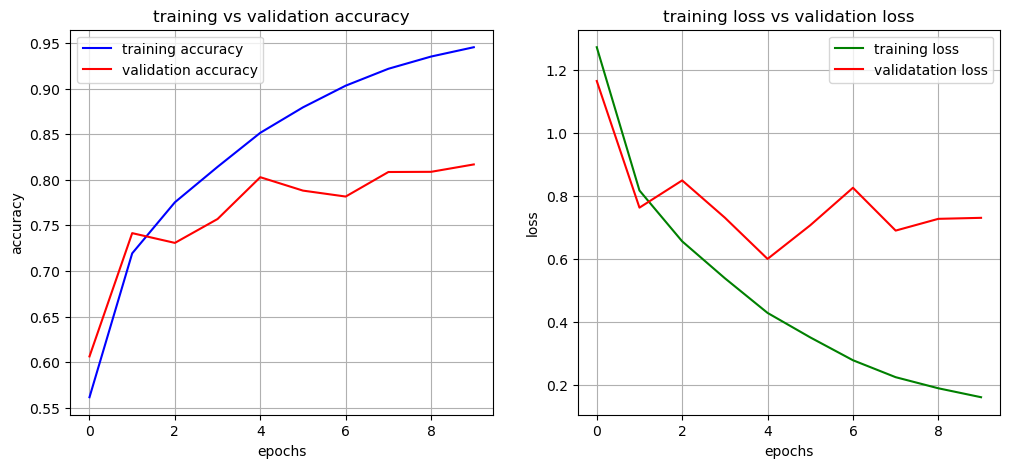

In [93]:
# showing a graph
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='training accuracy',color='blue')
plt.plot(history.history['val_accuracy'],label='validation accuracy',color='red')
plt.title('training vs validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='training loss',color='green')
plt.plot(history.history['val_loss'],label='validatation loss',color='red')
plt.title('training loss vs validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
predicted label:  cat
original_label:  automobile


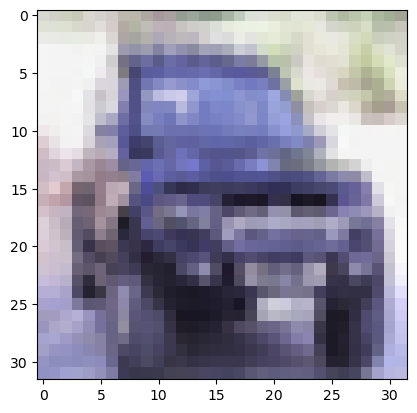

In [114]:
import numpy as np
# predict on test data
labels = '''airplane automobile bird cat deerdog frog horseship truck'''.split()
image_no=9
plt.imshow(test_images[image_no])
n=np.array(train_images[image_no])
p=n.reshape(1,32,32,3)
predicted_label=labels[model.predict(p).argmax()]
original_label=labels[np.argmax(test_labels[image_no])]
print('predicted label: ',predicted_label)
print('original_label: ',original_label)